In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pywt
import os
import numpy as np

In [5]:
# Specify file paths
train_csv = "./dataset/train.csv"  # Adjust the path to your train.csv file
test_csv = "./dataset/test.csv"    # Adjust the path to your test.csv file
image_folder = "./dataset/train/"

# Load CSV files
train = pd.read_csv(train_csv, usecols=["image_ID", "label"])
test = pd.read_csv(test_csv, usecols=["image_ID"])

# Display the shapes of the train and test datasets
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Optional: Display a few rows of the datasets
print("\nTrain DataFrame Preview:")
print(train.head())

print("\nTest DataFrame Preview:")
print(test.head())

Train shape: (8227, 2)
Test shape: (2056, 1)

Train DataFrame Preview:
         image_ID      label
0  7c225f7b61.jpg  Badminton
1         b31.jpg  Badminton
2  acb146546c.jpg  Badminton
3  0e62f4d8f2.jpg  Badminton
4  cfd2c28c74.jpg    Cricket

Test DataFrame Preview:
         image_ID
0  f5e13966e7.jpg
1  6674191b4e.jpg
2  91b5f8b7a9.jpg
3  393119b6d6.jpg
4  1ce5f81578.jpg


Original Image Resolution: (168, 299)
Approximation (cA) Component Resolution: (84, 150)
Horizontal Detail (cH) Component Resolution: (84, 150)
Vertical Detail (cV) Component Resolution: (84, 150)
Diagonal Detail (cD) Component Resolution: (84, 150)


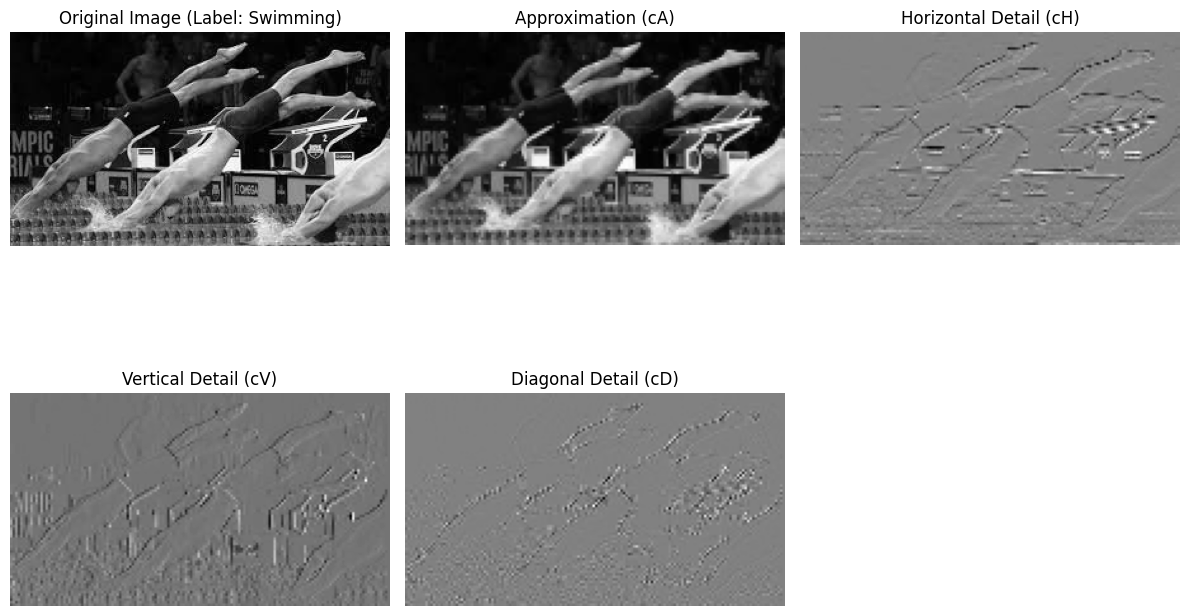

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pywt
import os

# Define paths
train_csv = "./dataset/train.csv"  # Path to your train.csv file
image_folder = "./dataset/train/"
image_filename = "0a1a257824.jpg"
image_path = os.path.join(image_folder, image_filename)

# Load the train CSV to find the label
train = pd.read_csv(train_csv, usecols=["image_ID", "label"])

# Find the label for the specific image
label_row = train[train["image_ID"] == "0a1a257824.jpg"]
if not label_row.empty:
    label = label_row.iloc[0]["label"]
else:
    label = "Label not found"

# Read the image
image = cv2.imread(image_path)
if image is not None:
    # Convert to grayscale for wavelet transformation
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Print resolution of the original image
    original_resolution = gray_image.shape
    print(f"Original Image Resolution: {original_resolution}")

    # Perform 2D Discrete Wavelet Transform (DWT) using 'haar' wavelet
    cA, (cH, cV, cD) = pywt.dwt2(gray_image, 'haar')  # Decompose into Approximation and Detail components

    # Print resolution of the components
    cA_resolution = cA.shape
    print(f"Approximation (cA) Component Resolution: {cA_resolution}")
    print(f"Horizontal Detail (cH) Component Resolution: {cH.shape}")
    print(f"Vertical Detail (cV) Component Resolution: {cV.shape}")
    print(f"Diagonal Detail (cD) Component Resolution: {cD.shape}")

    # Plot the original image and all wavelet components
    plt.figure(figsize=(12, 8))

    # Display original grayscale image
    plt.subplot(2, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title(f"Original Image (Label: {label})")
    plt.axis("off")

    # Display Approximation component (cA)
    plt.subplot(2, 3, 2)
    plt.imshow(cA, cmap='gray')
    plt.title("Approximation (cA)")
    plt.axis("off")

    # Display Horizontal Detail component (cH)
    plt.subplot(2, 3, 3)
    plt.imshow(cH, cmap='gray')
    plt.title("Horizontal Detail (cH)")
    plt.axis("off")

    # Display Vertical Detail component (cV)
    plt.subplot(2, 3, 4)
    plt.imshow(cV, cmap='gray')
    plt.title("Vertical Detail (cV)")
    plt.axis("off")

    # Display Diagonal Detail component (cD)
    plt.subplot(2, 3, 5)
    plt.imshow(cD, cmap='gray')
    plt.title("Diagonal Detail (cD)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print(f"Image not found: {image_path}")


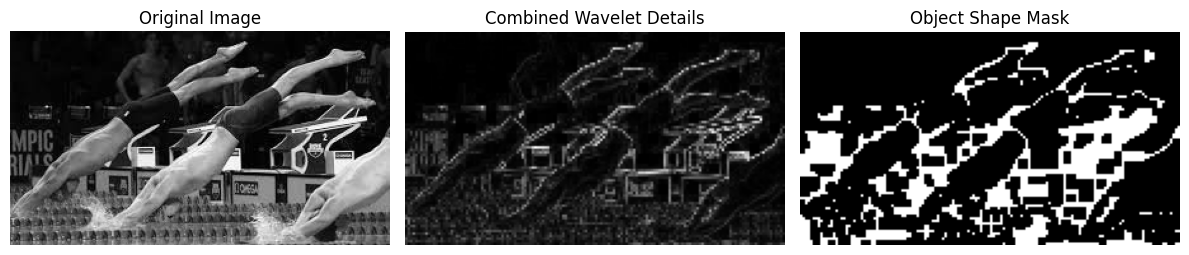

In [19]:

if image is not None:
    # Convert to grayscale for wavelet transformation
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform 2D Discrete Wavelet Transform (DWT) using 'haar' wavelet
    cA, (cH, cV, cD) = pywt.dwt2(gray_image, 'haar')

    # Combine the detail components to emphasize object edges
    combined_details = np.sqrt(cH**2 + cV**2 + cD**2)

    # Normalize the combined details to [0, 255]
    normalized_details = cv2.normalize(combined_details, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Threshold the details to create a binary mask
    _, binary_mask = cv2.threshold(normalized_details, 50, 255, cv2.THRESH_BINARY)

    # Optionally, use morphological operations to clean up the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    cleaned_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

    # Plot the results
    plt.figure(figsize=(12, 6))

    # Original grayscale image
    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    # Combined wavelet details
    plt.subplot(1, 3, 2)
    plt.imshow(normalized_details, cmap='gray')
    plt.title("Combined Wavelet Details")
    plt.axis("off")

    # Final object shape mask
    plt.subplot(1, 3, 3)
    plt.imshow(cleaned_mask, cmap='gray')
    plt.title("Object Shape Mask")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print(f"Image not found: {image_path}")

# UPSAMPLE 

In [20]:
import pandas as pd
import cv2
import pywt
import numpy as np
import os
import matplotlib.pyplot as plt

# Define paths
train_csv = "./dataset/train.csv"  # Path to your train.csv file
image_folder = "./dataset/train/"
output_folder = "./dataset/upsampled/"
os.makedirs(output_folder, exist_ok=True)

# Load the train CSV
train = pd.read_csv(train_csv, usecols=["image_ID", "label"])

# Count the number of images per class
class_counts = train["label"].value_counts()
max_count = class_counts.max()  # Target count is the number of images in the largest class (e.g., Cricket 1556)

# Function to generate combined wavelet details
def generate_wavelet_details(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is not None:
        # Convert to grayscale for wavelet transformation
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Perform 2D Discrete Wavelet Transform (DWT) using 'haar' wavelet
        cA, (cH, cV, cD) = pywt.dwt2(gray_image, 'haar')

        # Combine the detail components to emphasize object edges
        combined_details = np.sqrt(cH**2 + cV**2 + cD**2)

        # Normalize the combined details to [0, 255]
        normalized_details = cv2.normalize(combined_details, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        return normalized_details
    else:
        print(f"Image not found: {image_path}")
        return None

# Upsample each class
for label, count in class_counts.items():
    if count < max_count:
        print(f"Upsampling {label}: {max_count - count} images needed.")
        # Get the image IDs of the current class
        label_images = train[train["label"] == label]["image_ID"].tolist()
        
        for i in range(max_count - count):
            # Randomly select an image from the current class
            image_filename = np.random.choice(label_images)
            image_path = os.path.join(image_folder, image_filename)
            
            # Generate combined wavelet details for the image
            wavelet_details = generate_wavelet_details(image_path)
            if wavelet_details is not None:
                # Save the synthetic image (wavelet details as a new sample)
                synthetic_filename = f"{label}_synthetic_{i}.jpg"
                synthetic_path = os.path.join(output_folder, synthetic_filename)
                cv2.imwrite(synthetic_path, wavelet_details)

Upsampling Wrestling: 85 images needed.
Upsampling Tennis: 111 images needed.
Upsampling Badminton: 162 images needed.
Upsampling Soccer: 368 images needed.
Upsampling Swimming: 961 images needed.
Upsampling Karate: 978 images needed.


In [24]:
# Define a new DataFrame for synthetic images
synthetic_images = []

# Add synthetic images to the dataset
for label, count in class_counts.items():
    if count < max_count:
        for i in range(max_count - count):
            # Create the synthetic image filename
            synthetic_filename = f"{label}_synthetic_{i}.jpg"

            # Add the synthetic image and its label to the synthetic images list
            synthetic_images.append({"image_ID": synthetic_filename, "label": label})

# Convert the synthetic images list into a DataFrame
synthetic_df = pd.DataFrame(synthetic_images)

# Merge synthetic data with the original dataset
updated_train = pd.concat([train, synthetic_df], ignore_index=True)

# Shuffle the dataset to mix synthetic and original samples
updated_train = updated_train.sample(frac=1).reset_index(drop=True)

# Save the updated train CSV to the new folder train_upsample
train_upsample_csv_path = "./dataset/train_upsample.csv"
os.makedirs(os.path.dirname(train_upsample_csv_path), exist_ok=True)
updated_train.to_csv(train_upsample_csv_path, index=False)

print(f"Updated train.csv saved to: {train_upsample_csv_path}")


Updated train.csv saved to: ./dataset/train_upsample.csv


# DOWNSAMPLE

In [ ]:
# Define paths
train_csv = "./dataset/train.csv"  # Path to your train.csv file
image_folder = "./dataset/train/"
output_folder = "./dataset/downsampled/"
os.makedirs(output_folder, exist_ok=True)

# Load the train CSV
train = pd.read_csv(train_csv, usecols=["image_ID", "label"])

# Set the target count and resolution
target_count = 578  # Match the smallest class
target_resolution = (128, 128)  # Example lower resolution

# Function to downsample images using wavelet transformation
def downsample_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is not None:
        # Convert to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Perform 2D Discrete Wavelet Transform (DWT)
        cA, _ = pywt.dwt2(gray_image, 'haar')  # Use only the approximation component (cA)

        # Normalize the downsampled image to [0, 255]
        normalized_image = cv2.normalize(cA, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Resize to target resolution
        resized_image = cv2.resize(normalized_image, target_resolution)

        return resized_image
    else:
        print(f"Image not found: {image_path}")
        return None

# Process each class
for label, group in train.groupby("label"):
    image_ids = group["image_ID"].tolist()

    # Randomly sample images to match the target count
    sampled_images = (
        np.random.choice(image_ids, target_count, replace=False)  # For over-represented classes
        if len(image_ids) > target_count
        else image_ids  # Use all images for under-represented classes
    )

    # Process and save each sampled image
    for image_id in sampled_images:
        image_path = os.path.join(image_folder, image_id)
        downsampled_image = downsample_image(image_path)
        if downsampled_image is not None:
            # Save the downsampled image
            output_path = os.path.join(output_folder, f"{label}_{os.path.splitext(image_id)[0]}.jpg")
            cv2.imwrite(output_path, downsampled_image)

print("Downsampling and dataset creation complete!")


In [27]:
import os
import pandas as pd

# Define the folder containing downsampled images
downsampled_folder = "./dataset/downsampled/"
downsampled_csv_path = "./dataset/train_downsampled.csv"

# Initialize a list to store image metadata
downsampled_images = []

# Iterate over all files in the downsampled folder
for filename in os.listdir(downsampled_folder):
    if filename.endswith(".jpg"):  # Filter only image files
        # Extract the label from the filename (assuming it's part of the filename, e.g., "label_imageID.jpg")
        label = filename.split("_")[0]  # Extract the part before the first underscore as the label
        
        # Add the file info to the list
        downsampled_images.append({"image_ID": filename, "label": label})

# Create a DataFrame for the downsampled images
downsampled_df = pd.DataFrame(downsampled_images)

# Save the DataFrame to a CSV file
downsampled_df.to_csv(downsampled_csv_path, index=False)

print(f"train_downsampled.csv created with {len(downsampled_images)} entries at: {downsampled_csv_path}")


train_downsampled.csv created with 4046 entries at: ./dataset/train_downsampled.csv
